In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
lst2D = [i for i in os.listdir() if ("2D" in i) and ("test" not in i)]
lst2D

['2D_pp2400m_322_obs_vario0.4_a5000_thk_0st',
 '2D_pp2700m_322obs_vario0.4_a5000',
 '2D_pp2700_322_obs_vario0.4_a5000_thk_0st',
 '2D_pp2700_322_obs_vario0.4_a5000_thk_1st']

In [3]:
lst3D = [i for i in os.listdir() if ("3D" in i) and ("test" not in i)]
lst3D

['3D_pp2400_VarQ0.4_a3000_VarP0.4_a5000',
 '3D_pp2700_VarQ0.5_a3000_VarP0.5_a5000',
 '3D_pp3000_VarQ0.5_a4000_VarP0.5_a6000']

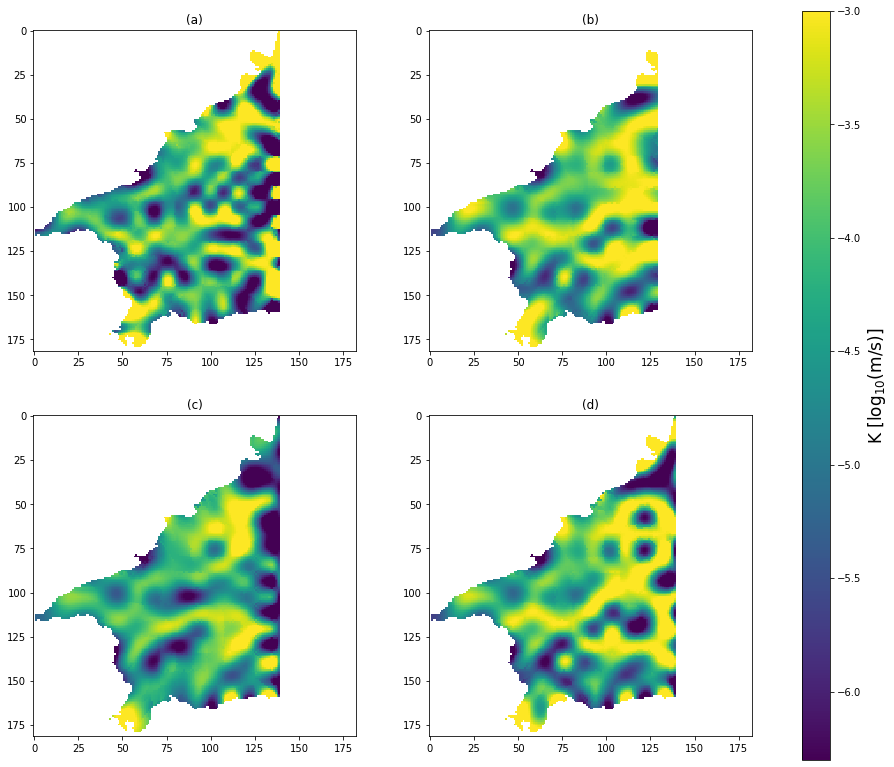

In [4]:
fig,ax = plt.subplots(2,2,figsize=(13,13))
o = 0
i= 0
lst = ["(a)","(b)","(c)","(d)"]
for inv in lst2D:
    ktxt = np.log10(np.loadtxt(os.path.join(inv,"k.txt")))
    ax[o,i].set(title="{}".format(lst[o*2+i]))
    g = ax[o,i].imshow(ktxt)
    i += 1
    if i > 1:
        o += 1
        i = 0
    
cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(g, cax = cbaxes)
cb.set_label("K [log$_{10}$(m/s)]",fontsize=17)

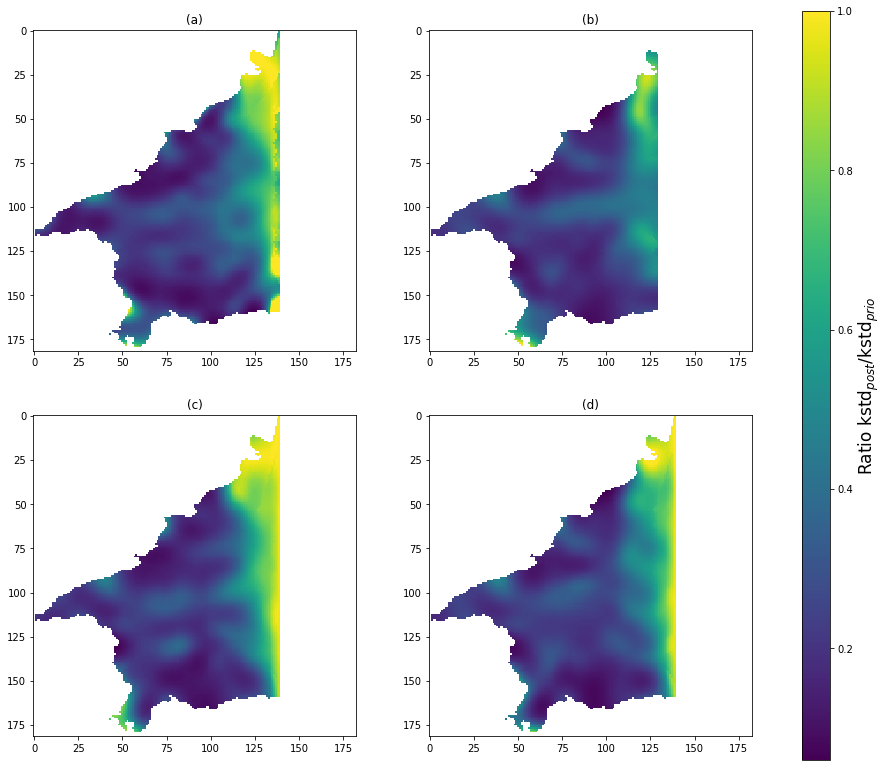

In [10]:
fig,ax = plt.subplots(2,2,figsize=(13,13))
o = 0
i= 0
lst = ["(a)","(b)","(c)","(d)"]
for inv in lst2D:
    ktxt = np.loadtxt(os.path.join(inv,"kstd.txt"))
    ax[o,i].set(title="{}".format(lst[o*2+i]))
    g = ax[o,i].imshow(ktxt/1e-5,vmax=1)
    i += 1
    if i > 1:
        o += 1
        i = 0
    
cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(g, cax = cbaxes)
cb.set_label(r"Ratio kstd$_{post}$/kstd$_{prio}$",fontsize=17)

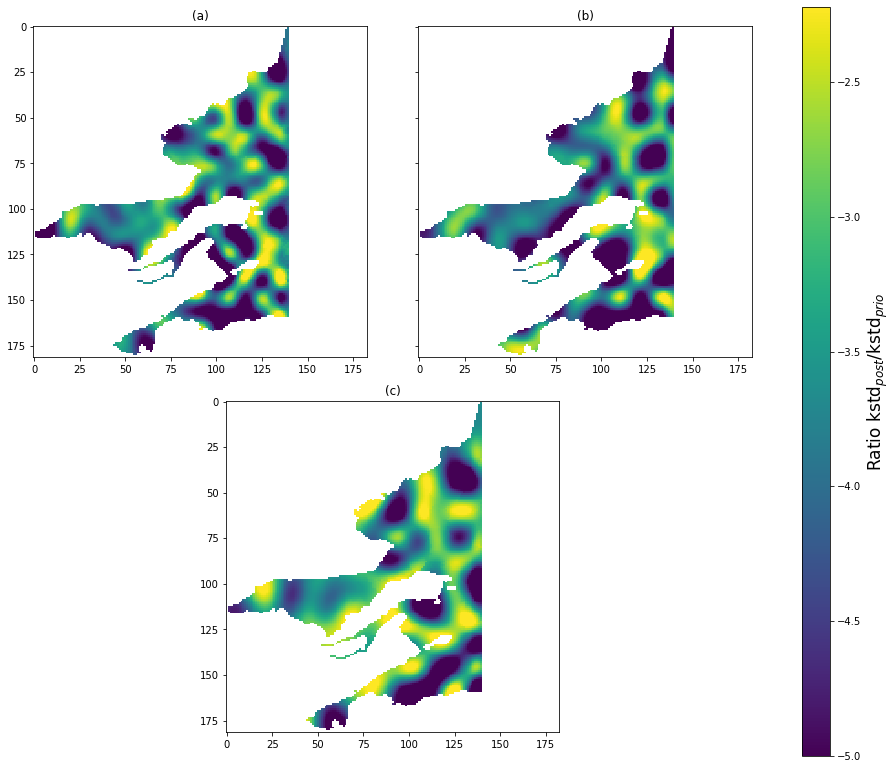

In [9]:
fig = plt.figure(figsize=(13,13))
grid = plt.GridSpec(4, 4, wspace=0.3, hspace=0.3) # grid for plot

a1 = fig.add_subplot(grid[0:2,0:2])
a2 = fig.add_subplot(grid[0:2,2:4], yticklabels=[])
a3 = fig.add_subplot(grid[2:4,1:3])

axes = [a1,a2,a3]
lst = ["(a)","(b)","(c)","(d)"]
for ax,inv,tit in zip(axes,lst3D,lst):
    ktxt = np.log10(np.loadtxt(os.path.join(inv,"kQmin.txt")))
    ax.set(title="{}".format(tit))
    g = ax.imshow(ktxt)
    
cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(g, cax = cbaxes)
cb.set_label(r"Ratio kstd$_{post}$/kstd$_{prio}$",fontsize=17)

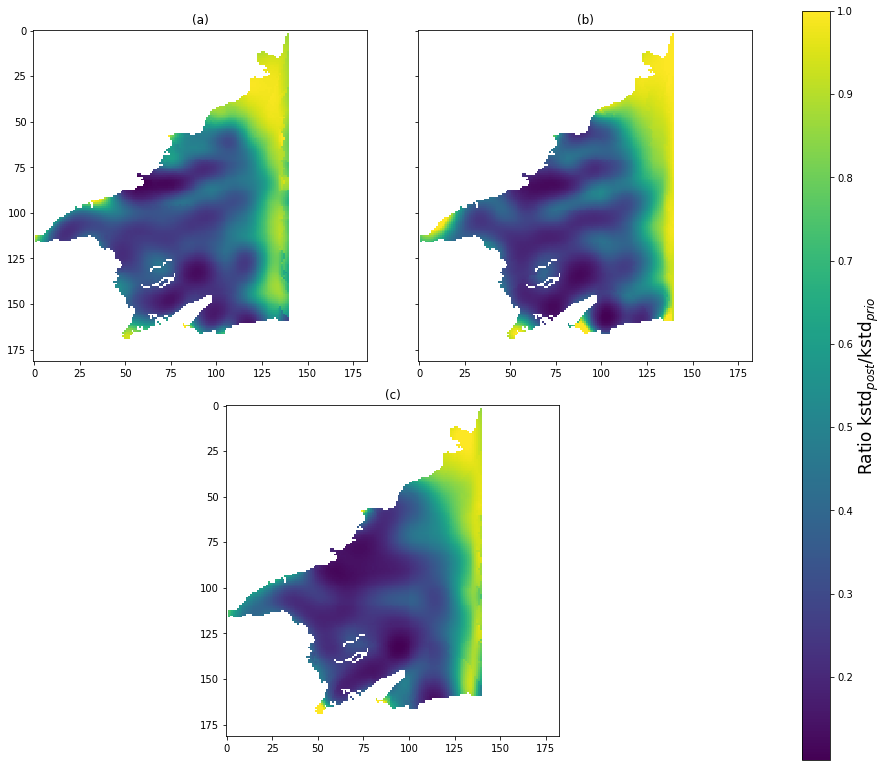

In [6]:
fig = plt.figure(figsize=(13,13))
grid = plt.GridSpec(4, 4, wspace=0.3, hspace=0.3) # grid for plot

a1 = fig.add_subplot(grid[0:2,0:2])
a2 = fig.add_subplot(grid[0:2,2:4], yticklabels=[])
a3 = fig.add_subplot(grid[2:4,1:3])

axes = [a1,a2,a3]
lst = ["(a)","(b)","(c)","(d)"]
for ax,inv,tit in zip(axes,lst3D,lst):
    ktxt = np.loadtxt(os.path.join(inv,"kPstd.txt"))
    ax.set(title="{}".format(tit))
    g = ax.imshow(ktxt/1e-5,vmax=1)
    
cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(g, cax = cbaxes)
cb.set_label(r"Ratio kstd$_{post}$/kstd$_{prio}$",fontsize=17)

In [33]:
m_d = "master_glm_run"
case = "2D_test"
lst = []
ymax = []
for inv in lst2D:
    dfp = df=pd.read_csv(os.path.join(inv,m_d,"{}.par.usum.csv".format(case)),index_col=0)

    rpnm=[i for i in dfp.index if "C_" in i]
    for i in rpnm:
        lst.append(10**dfp.loc[i,"post_mean"])
        ymax.append(10**dfp.loc[i,"post_upper_bound"])


In [34]:
riv = np.array(lst).reshape(4,6)
ymax = np.array(ymax).reshape(4,6)
yerr = ymax-riv

In [35]:
import seaborn as sns
sns.set()

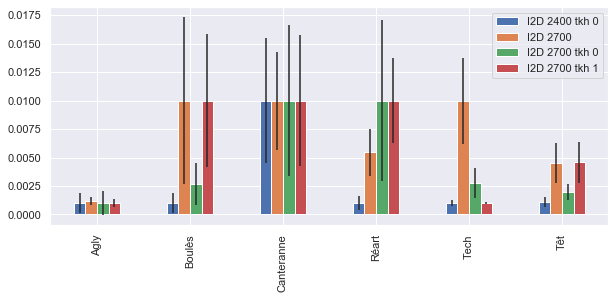

In [36]:
fig,ax=plt.subplots(figsize=(10,4))

df_riv = pd.DataFrame(riv,index=["I2D 2400 tkh 0","I2D 2700","I2D 2700 tkh 0","I2D 2700 tkh 1"],columns=["Agly","Boulès","Canteranne","Réart","Tech","Têt"])
df_riv.T.plot(kind="bar",ax=ax,yerr=yerr)

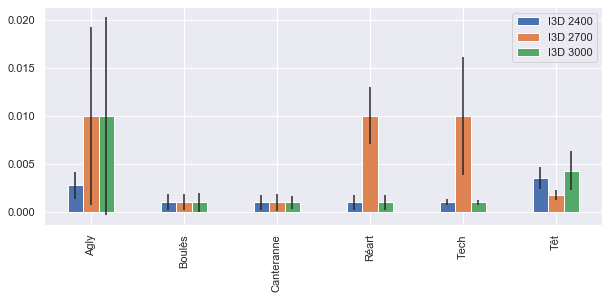

In [37]:
case = "3D_test"
lst = []
ymax = []
for inv in lst3D:
    dfp = df=pd.read_csv(os.path.join(inv,m_d,"{}.par.usum.csv".format(case)),index_col=0)

    rpnm=[i for i in dfp.index if ("C_A" in i)|("C_B" in i)|("C_C" in i)|("C_R" in i)|("C_T" in i)]
    for i in rpnm:
        lst.append(10**dfp.loc[i,"post_mean"])
        ymax.append(10**dfp.loc[i,"post_upper_bound"])
riv = np.array(lst).reshape(3,6)
ymax = np.array(ymax).reshape(3,6)
yerr = ymax-riv

fig,ax=plt.subplots(figsize=(10,4))

df_riv = pd.DataFrame(riv,index=["I3D 2400","I3D 2700","I3D 3000"],columns=["Agly","Boulès","Canteranne","Réart","Tech","Têt"])
df_riv.T.plot(kind="bar",ax=ax,yerr=yerr)